<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-1/blob/main/Assignment/0624_Python_Machine_Learning_p409_p451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 07. 군집화

## **01. K-평균 알고리즘 이해**
---
: 군집 중심(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

- 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘
1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음
2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됨
3. 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동함
4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경함
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동함
6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료함

- K-평균의 장점
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
- K-평균의 단점
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐(이를 위해 PCA로 차원 감소를 적용해야 할 수도 있음)
    - 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
    - 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어려움

> 사이킷런 KMeans 클래스 소개
> ---

- 사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공한다.

`class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
precompute_distances='auto', verbose=0, random_state=None,
copy_x=True, n_jobs=1, algorithm='auto')`

-    - `n_clusters`: KMeans 초기화 파라미터 중 가장 중요한 파라미터로, 이는 군집화할 개수. 즉 군집 중심점의 개수를 의미
    - `init`: 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정
    - `max_iter`: 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터 중심점 이동이 없으면 종료
- KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 `fit()`, `fit_transform()` 메서드를 이용해 수행하면 된다.
- 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성 알 수 있다.
    - `labels`: 각 데이터 포인트가 속한 군집 중심점 레이블
    - `cluster_centers`: 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 가능

> ### K-평균을 이용한 붓꽃 데이터 세트 시각화
> ---

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


- 붓꽃 데이터 세트를 3개 그룹으로 군집화

In [2]:
## 붓꽃 데이터 세트를 3개 그룹으로 군집화

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


    labels_의 값이 0,1,2로 되어 있고, 이는 각 레코드가 1,2,3 번째 군집에 속함을 의미함

- 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화 효과를 확인

In [4]:
## 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화 효과를 확인

irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


    분류 타깃이 0값인 데이터는 1번 군집으로 모두 잘 그루핑됨

- 붓꽃 데이터 세트의 군집화 시각화
    - 붓꽃 데이터 세트의 속성이 4개이므로 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X 좌표, Y 좌표로 개별 데이터 표현

In [5]:
## PCA를 이용해 2개의 차원으로 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


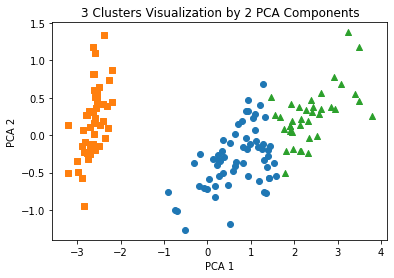

In [6]:
## 붓꽃 데이터 세트의 군집화 시각화

# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

    Cluster 1을 나타내는 네모는 명확히 다른 군집과 잘 분리돼 있음.
    Cluster 0을 나타내는 동그라미('o')와 2를 나타내는 세모('^')는 상당 수준 분리돼 있지만, 네모만큼 명확하게 분리돼 있지 않음.

> ### 군집화 알고리즘 테스트를 위한 데이터 생성
> ---

- 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해 보기 위한 간단한 데이터 생성기를 제공한다.
    - 대표적인 군집화용 데이터 생성기로는 `make_blobs()`와 `make_classification()` API가 있음
    - 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성 가능
    - 둘 중에 어떤 것을 사용하든 큰 차이는 없으나, `make_blobs()`는 개별 군집의 중심점과 표준 편차 제어 기능이 추가돼 있으며 `make_classification()`은 노이즈를 포함한 데이터를 만드는데 유용하게 사용할 수 있음
    - 둘 다 분류 용도로도 테스트 데이터 생성 가능

- `make_blobs()` 사용법
    - `n_samples`: 생성할 총 데이터 개수.디폴트는 100개
    - `n_features`: 데이터 피처 개수. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현
    - `centers`: int 값. 3과 같은 숫자로 설정하면 군집의 개수를, ndarray 형태로 표현하면 개별 군집 중심점의 좌표를 의미
    - `cluster_std`: 생성될 군집 데이터의 표준 편차. float 형태로 지정하면 해당 값을 표준편차로 갖는 데이터를 만들어짐. 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용

In [7]:
## 데이터 생성

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape,y.shape)

# y target 값의 분포 확인
unique, counts = np.unique(y,return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
## 좀 더 데이터 가공 편리하게 하기 위해 DataFrame으로 변경

import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


- 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인
    - 타깃값 0, 1, 2에 따라 마커 다르게 하여 산점도 그리기

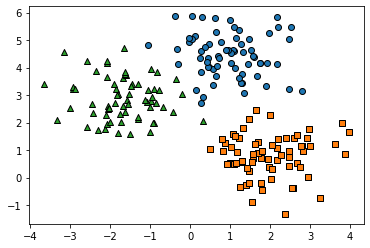

In [9]:
## 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인

target_list = np.unique(y)
#각 타깃별 산점도의 마커 값
markers = ['o','s','^','P','D','H','x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2로 scatter plot 을 marker별로 생성
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
              marker=markers[target])
plt.show()

- 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화
    - KMeans 객체에 `fit_predict(X)`를 수행해 `make_blobs()`의 피처 데이터 세트인 X 데이터를 군집화
    - 앞에서 구한 clusterDF DataFrame의 'kmeans_label' 칼럼으로 저장
    - KMeans 객체의 `cluster_centers_` 속성은 개별 군집의 중심 위치 좌표를 나타내기 위해 사용

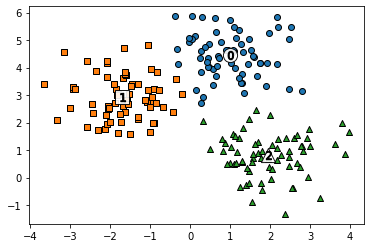

In [10]:
## 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화

# KMeans 객체를 이용해 X데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
              marker=markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
              marker='$%d$' % label)

plt.show()

    make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


- `make_blobs()`은 `cluster_std` 파라미터로 데이터의 분포도를 조절한다.
    - `cluster_std`가 작을수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있음

## **02. 군집 평가(Cluster Evaluation)**
---

- 대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않다.
- 군집화는 분류(Classification)와 유사해 보일 수 있으나 성격이 많이 다르다.


> ### 실루엣 분석의 개요
> ---

- 군집화 평가 방법으로 실루엣 분석(silhouetter analysis)이 있다.
- 실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나타냄
    - 효율적으로 분리가 잘 되었다는 것은 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
    - 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것임
- 실루엣 분석은 실루엣 계수(silhouetter coefficient)를 기반으로 한다.
- 실루엣 계수: 개별 데이터가 가지는 군집화 지표
    - 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표
$$s(i) = \frac{(b(i) - a(i))}{(max(a(i),b(i)))}$$
    - a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
    - b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
    - -1에서 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것
    - -값은 아예 다른 군집 데이터 포인트가 할당됐음을 뜻함

- 사이킷런은 실루엣 분석을 위해 다음과 같은 메서드를 제공한다.
    - `sklearn.metrics.silhouette_samples(X,labels,metric='euclidean',**kwds)`: 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환
    - `sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)`: 인자로 X_feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환. 일반적으로 이 값이 높을 수록 군집화가 어느 정도 잘 됐다고 판단 가능. 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수는 없음
- 좋은 군집화가 되기 위한 조건
    - 전체 실루엣 계수의 평균값, 즉 사이킷런의 `silhouetter_score()` 값은 0 ~ 1사이의 값을 가지며, 1에 가까울 수록 좋음
    - 하지만 전체 실루엣계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요함

> ### 붓꽃 데이터 세트를 이용한 군집 평가
> ---

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouertte Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouertte Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


- 군집별 평균 실루엣 계수 값 알아보기

In [13]:
## 군집별 평균 실루엣 계수 값 알아보기

irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

> ### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
> ---

- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없다.
- 특정 군집 내의 실루엣 계수 값만 너무 높고 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있다.
- `visualize_silhouette()`: 내부 파라미터로 여러개의 군집 개수를 리스트로 가지는 첫번째 파라미터와 피처 데이터 세트인 두번째 파라미터를 가짐

In [14]:
## 여러개의 클러스터링 갯수를 리스트로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx()형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

- `make_blobs()` 함수를 통해 4개 군집 중심의 500개 2차원 데이터 세트 만들고 K-평균으로 군집화할 때 2개, 3개, 4개, 5개 중 최적의 군집 개수 시각화

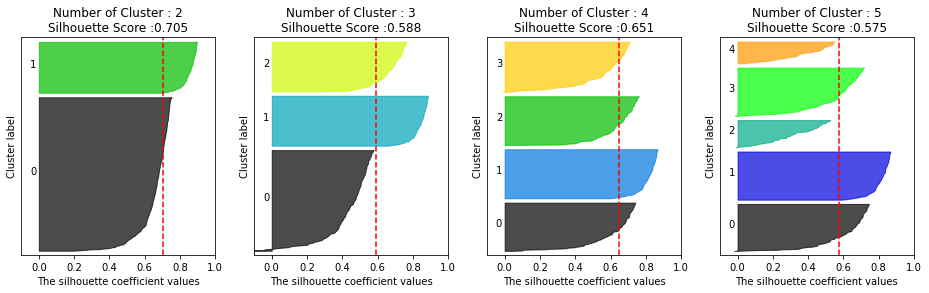

In [15]:
## 2차원 데이터 세트 만들고 K-평균으로 군집화할 때 2개, 3개, 4개, 5개 중 최적의 군집 개수 시각화

# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                 center_box=(-10.0,10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

- 붓꽃 데이터 데이터를 이용해 K-평균 수행 시 최적의 군집 개수 알아보기

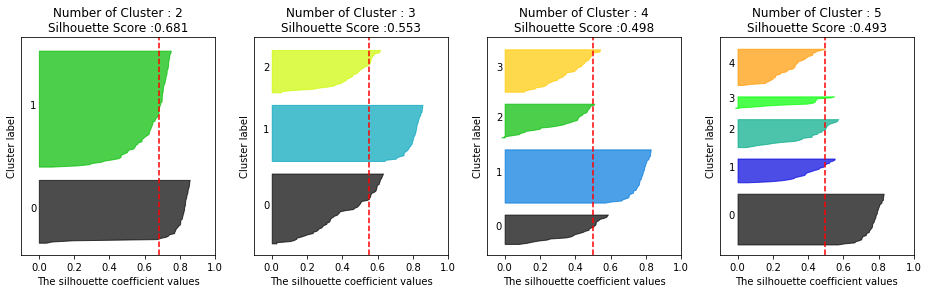

In [16]:
## 붓꽃 데이터 데이터를 이용해 K-평균 수행 시 최적의 군집 개수 알아보기

from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

## **03. 평균 이동**
---

> ### 평균 이동(Mean Shift)의 개요
> ---

- 평균 이동(Mean Shift)은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행한다. 하지만 K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다.
- 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾는다.
    - 가장 집중적으로 데이터가 모여있어 학률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)를 이용함
- 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취한다.

    1. 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 KDE기반의 Mean Shift 알고리즘으로 계산
    2. KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동
    3. 모든 데이터를 1 ~ 2까지 수행하면서 데이터를 이동. 개별 데이터들이 군집 중심점으로 모임
    4. 지정된 반복(iteration) 횟수만큼 전체 데이터에 대해서 KDE 기반으로 데이터를 이동시키면서 군집화 수행
    5. 개별 데이터들이 모인 중심점을 군집 중심점으로 설정

- KDE(Kernel Density Estimation)는 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다.
    - KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로서 가우시안 분포 함수가 사용됨
$$KDE = {1\over n}\sum_{i=1}^nK_h(x-x_i) = {1 \over nh}\sum_{i=1}^nK({x-x_i \over h})$$
    - $K$: 커널 함수
    - $x$: 확률 변숫값
    - $x_i$: 관측값
    - $h$: 대역폭(bandwidth)
        - 대역폭 $h$는 KDE 형태틑 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우 가능
        - 작은 $h$값(h=1.0)은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fiitting)하기 쉬움
        - 매우 큰 $h$값(h=10)은 과도하게 평활화된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합(under-fitting)하기 쉬움
- 일반적으로 평균 이동 군집화는 대역폭이 클수록 평활된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가진다.
- *평균 이동 군집화 알고리즘 적용 예제*

In [17]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


    지나치게 세분화돼 군집화됨. 일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아짐

- bandwidth를 살짝 높여 MeanShift 수행

In [18]:
## bandwidth를 살짝 높여 MeanShift 수행

meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- MeanShift에서는 bandwidth를 최적화 값으로 설정하는 것이 매우 중요하다.
- 사이킷런은 최적화된 bandwidth 값을 찾기 위해서 `estimate_bandwidth()` 함수를 제공한다.
    - 파라미터로 피처 데이터 세트를 이볅해주면 최적화된 값 반환

In [19]:
## 최적화된 bandwidth 값 찾기

from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


- 측정된 bandwidth를 평균 이동 입력값으로 적용해 동일한 `make_blobs()` 데이터 세트에 군집화 수행

In [20]:
## 측정된 bandwidth를 평균 이동 입력값으로 적용해 동일한 데이터 세트에 군집화 수행

import pandas as pd

clusterDF = pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 구성된 3개의 군집을 시각화
    - 평균 이동도 K-평균과 유사하게 중심을 가지므로 `cluster_centers_` 속성으로 군집 중심 좌표 표시 가능

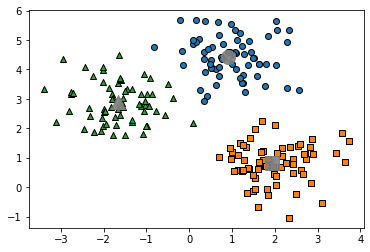

In [21]:
## 구성된 3개의 군집을 시각화

import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]

  # 군집별 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 표현하기
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
              marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='gray', alpha=0.9,
              marker='$%d$' % label)

plt.show()

- target 값과 군집 label 값 비교

In [22]:
## target 값과 군집 label 값 비교

print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- 평균 이동의 장점
    - 데이터 세트의 형태를 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능한 것
    - 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없음
- 평균 이동의 단점
    - 알고리즘 수행 시간이 오래 걸리고 무엇보다도 bandwidth의 크기에 따른 군집화 영향도가 매우 큼
- 일반적으로 평균 이동 군집화 기법은 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더 많이 사용된다.


## **04. GMM(Gaussian Mixture Model)**
---


> ### GMM(Gaussian Mixture Model) 소개
> ---

: 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식

- 가우시안 분포: 정규분포로도 알려졌으며, 좌우 대칭형의 종 형태를 가진 통계학에서 가장 잘 알려진 연속 확룰 함수
- GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주한다. 섞인 데이터 분포에서 개별 유형의 가우시안 분포 추출한다.
- 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이다.
    - GMM에서는 모수 추정이라고 하는데, 대표적으로 2가지를 추정하는 것이다.
        - 개별 정규 분포의 평균과 분산
        - 각 데이터가 어떤 정규 분포에 해당되는지의 확률
        - GMM은 EM(Expectation and Maximization) 방법을 적용함

> ### GMM을 이용한 붓꽃 데이터 세트 군집화
> ---

- GMM은 확률 기반 군집화이고 K-평균은 거리 기반 군집화이다.
- *붓꽃 데이터 세트로 두 가지 방식을 비교*

In [23]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

- GaussianMixture 객체의 가장 중요한 초기화 파라미터: `n_components`
    - 모델의 총 개수, 군집의 개수를 정하는 데 중요한 역할을 수행

In [24]:
## 타깃별로 군집이 어떻게 매핑됐는지 확인

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑되는지 확인
iris_result = irisDF.groupby('target')['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


    앞 절의 붓꽃 데이터 세트의 K-평균 군집화 결과보다 더 효과적인 분류 결과가 도출됨

In [25]:
## 붓꽃 데이터 세트의 K-평균 군집화를 수행한 결과

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


> ### GMM과 K-평균의 비교
> ---

- KMeans는 원형의 범위에서 군집화를 수행한다.
- KMeans는 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못한다.

In [26]:
## 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체 등을 인자로 받아
## 클러스터링 결과를 시각화하는 함수 생성

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

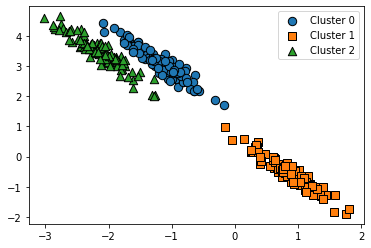

In [27]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개 데이터 세트, 3개 군집 세트, cluster_std=0.5를 만듦
X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형 데이터 세트를 생성하기 위해 변형함
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85283229]]
X_ansio = np.dot(X,transformation)

# feature 데이터 세트와 make_blob()의 y 결과값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_ansio, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- KMeans로 군집화 수행

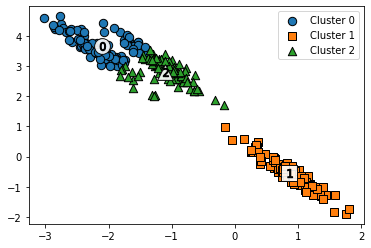

In [28]:
## KMeans가 위 데이터 세트를 어떻게 군집화하는지 확인

# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_ansio)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

    KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음을 알 수 있음
- GMM으로 군집화 수행

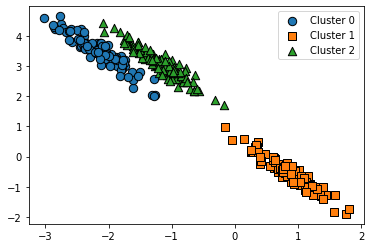

In [29]:
## GMM으로 군집화

# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_ansio).predict(X_ansio)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm,clusterDF,'gmm_label',iscenter=False)

    데이터가 분포된 방향에 따라 정확하게 군집화됐음을 알 수 있음.
    GMMM은 K-평균과 다르게 군집의 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 visualize_cluster_plot()에서 시각화되지 않음

- `make_blobs()`의 target 값과 KMeans, GMM의 군집 Label 값을 서로 비교해 위 데이터 세트에서 얼만큼의 군집화 효율 차이가 발생하는지 확인

In [30]:
## 얼만큼의 군집화 효율 차이가 발생하는지 확인

print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


## **05. DBSCAN**
---

> ### DBSCAN 개요
> ---

- DBSCAN(Density Based Spatial Clustering of Applications with Noise)은 밀도 기반 군집화의 대표적인 알고리즘이다.
- DBSCAN은 간단하고 직관적인 알고리즘이나 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다.
- 가장 중요한 두 가지 파라미터
    - 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
    - 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
- 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트 정의한다,
  - 핵심 포인트(Core point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터
  - 이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터
  - 경계 포인트(Border Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
  - 잡음 포인트(Noise Point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터
- DBSCAN은 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식이다.
- 사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘을 지원하며, 주요한 초기화 파라미터 가진다.
    - `eps`: 입실론 주변 영역의 반경
    - `min_samples`: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함될 데이터의 최소 개수 (자신의 데이터 포함, min points + 1)

> ### DBSCAN 적용하기 - 붓꽃 데이터 세트
> ---

In [31]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


    dbscan_cluster 값을 살펴보면, 0과 1 외에 특이하게 -1이 군집 레이블로 있는 것을 알 수 있는데, 이는 노이즈에 속하는 군집을 의미함
    위 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두 개의 군집으로 군집화됨
    Target 값의 유형이 3가지인데, 군집이 2개가 됐다고 군집화 효율이 떨어진다는 의미는 아님

- DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현
    - PCA를 이용해 2개의 피처로 압축 변환한 뒤, `viusalize_cluster_plot()` 함수를 이용해 시각화

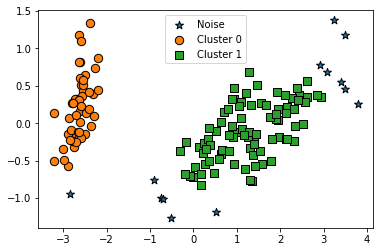

In [33]:
## DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현

from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 컴포넌트 2개로 pca 변환하기
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 pca 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan,irisDF, 'dbscan_cluster', iscenter=False)

    별표로 표현된 값은 모두 노이즈임

- DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋으며, 적절한 `eps`와 `min_samples` 파라미터를 통해 최적의 군집을 찾는 게 중요하다.
    - 일반적으로 `eps`를 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐
    - `min samples`를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 더 커지게 됨
- `eps` 증가시켜 노이즈 데이터 수 확인
    

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


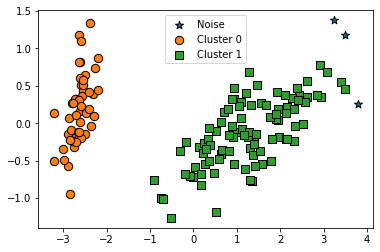

In [34]:
## eps 증가시켜 노이즈 데이터 수 확인

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- `eps`는 기존으로 유지하고 `min_samples`를 늘려 확인

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


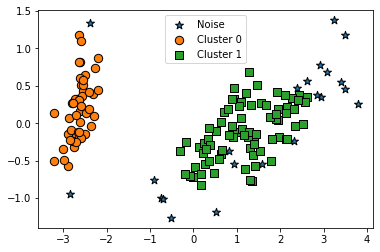

In [35]:
## min_samples를 증사시켜 확인

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby('target')['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan,irisDF, 'dbscan_cluster', iscenter=False)

> ### DBSCAN 적용하기 - make_circles() 데이터 세트
> ---

- `make_circles()` 함수를 이용해 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트 만들기
    - 오직 2개의 피처만을 생성하므로 별도의 피처 개수 지정 필요 없음
    - 파라미터 `noise`는 노이즈 데이터 세트의 비율이며, `facto`r는 외부 원과 내부 원의 scale 비율

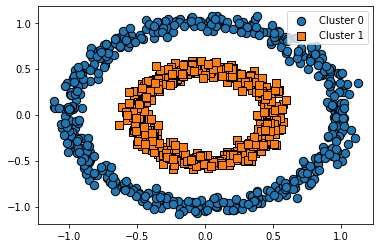

In [36]:
## make_circles() 함수를 이용해 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트 만들기

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- DBSCAN이 이 데이터 세트를 군집화한 결과를 보기 전에 먼저 K-평균과 GMM은 어떻게 이 데이터 세트 군집화하는지 확인

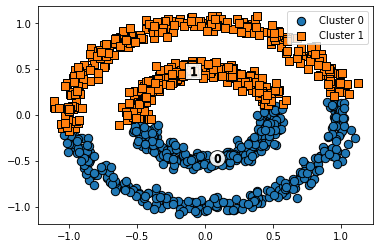

In [37]:
## K-평균으로 군집화 수행

# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_label = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

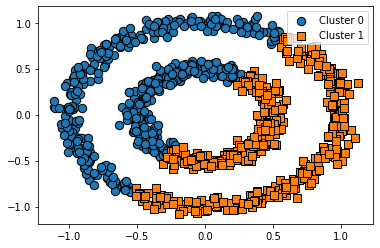

In [38]:
## GMM으로 군집화 수행

# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit_predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

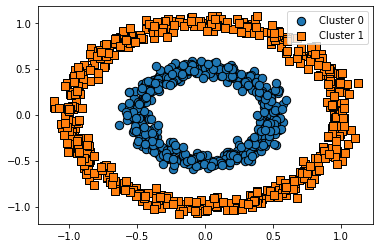

In [39]:
## DBSCAN으로 군집화 수행

# DBSCAM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_label = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_label

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)